In [146]:
import numpy as np
import pandas as pd
from Functions import *

In [147]:
int(np.log10(2000)-0.5)

2

In [148]:
def ticks_arr(data_arr):
    largest_divider_max = 10**int(np.log10(np.max(data_arr))-0.5)
    ticks_arr = np.arange(largest_divider_max,
                          int(np.max(data_arr)/largest_divider_max)*largest_divider_max,
                          largest_divider_max)
    if np.min(data_arr)<0:
        largest_divider_min = 10**int(np.log10(-np.min(data_arr)))
        nega_arr = np.arange(int(np.min(data_arr)/largest_divider_min)*largest_divider_min,
                             -largest_divider_min, largest_divider_min)
        ticks_arr = np.r_[nega_arr,np.array([0,]),ticks_arr]

    return ticks_arr

In [149]:
ticks_arr(np.linspace(-700,4000,10))

array([-700, -600, -500, -400, -300, -200,    0, 1000, 2000, 3000])

In [150]:
ticks_arr(np.linspace(-7000,1400,10))

array([-7000, -6000, -5000, -4000, -3000, -2000,     0,   100,   200,
         300,   400,   500,   600,   700,   800,   900,  1000,  1100,
        1200,  1300])

In [151]:
filename_ADrange = "./results/AD_range.txt"

In [152]:
data_arr = []
with open(filename_ADrange,'r') as f:
    lines = f.readlines()
    for line in lines[1:]:
        line_strip = line.strip()
        gapx = float(line_strip.split(",")[0])
        gapy = float(line_strip.split(",")[1])
        iso_zero = float(line_strip.split(",")[2])   # zero dispersion pt of isolated ring
        left_zero = float(line_strip.split(",")[3])  # left zero dispersion pt of coupled ring
        right_zero = float(line_strip.split(",")[4]) # right zero dispersion pt of coupled ring
        data_arr.append([gapx,iso_zero,left_zero,right_zero])
data_arr = (np.array(data_arr),)
data_arr


(array([[   2.6     , 1517.267206, 1502.020202, 1556.902429],
        [   2.7     , 1517.267307, 1502.020202, 1557.634854],
        [   2.8     , 1517.267409, 1530.702813, 1558.005299],
        [   2.9     , 1517.267511, 1532.19064 , 1558.219524],
        [   3.      , 1517.267613, 1533.792671, 1558.27716 ]]),)

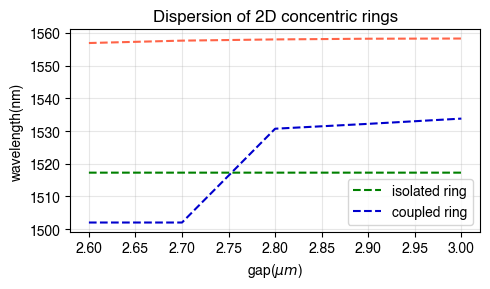

In [153]:
Plot_curve(data_arr,
        Y_legends=['isolated ring','coupled ring','']*2,
        X_label=r'gap($\mu m$)',Y_label='wavelength(nm)',
        title = "Dispersion of 2D concentric rings",
        figsize=(5,3),
        marker_list=["","","","","",""]*2,
        linestyle_list=["--","--","--","--","-","-","-","-"],
        colors_list=['green','mediumblue','tomato','orange',
                        'tomato','orange','deepskyblue','lightskyblue']*2)

In [154]:
filename_D_iso = "./results/Dispersion_isolated_WG.csv"
filename_D_coupled = "./results/Dispersion_coupled_WG.csv"

In [155]:
df_iso = pd.read_csv(filename_D_iso)
Y_data = ()


In [156]:
np.shape(np.arange(0,len(wavl_arr)-1,5))

(19,)

In [157]:
wavl_arr_ticks = [wavl_arr[5*i]  for i in range(int(len(wavl_arr)/5))]
np.shape(wavl_arr_ticks)

(19,)

In [158]:
np.arange(0,len(wavl_arr)-1,fold_num)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90])

In [159]:
df_coupled = pd.read_csv(filename_D_coupled)
fold_num = 5
Y_data = ()
gap_arr = []
wavl_arr = np.linspace(1500,1600,100)[2:-2]
wavl_arr_ticks = ["{:.2f}".format(wavl_arr[fold_num*i]/1e3) for i in range(int(len(wavl_arr)/fold_num))]
data_arr = []
for column in df_coupled.columns:
    column_data = column.replace("(","").replace(")","")
    gapx = float(column_data.split(",")[0])
    gapy = float(column_data.split(",")[1])
    gap = np.sqrt(gapx**2 + gapy**2)
    print("gap:{:.2f}".format(gap))
    gap_arr.append(gap)
    data_arr.append(df_iso[column])

data_arr = np.array(data_arr)
np.shape(data_arr)


gap:2.50
gap:2.55
gap:2.60
gap:2.65
gap:2.70
gap:2.75
gap:2.80


(7, 96)

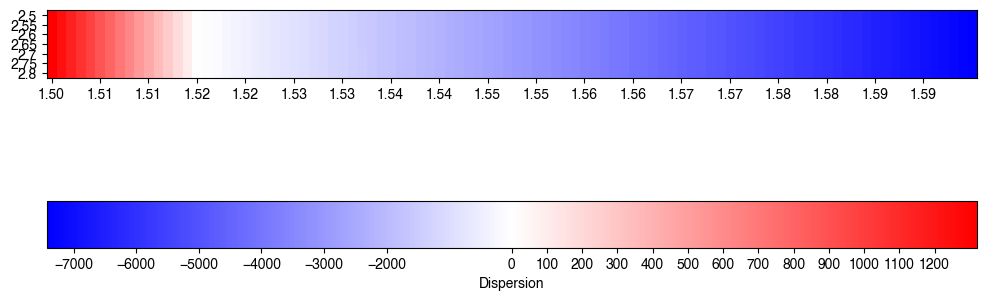

In [165]:
from matplotlib.colors import TwoSlopeNorm
fonttype = "Helvetica"
fontsize = 10
colormap = "bwr"
figsize  = (12,8)
cbar_num_of_pts = 6

norm = TwoSlopeNorm(vmin=np.min(data_arr), vcenter=0, vmax=np.max(data_arr))

fig, ax = plt.subplots(figsize=figsize)
im = ax.imshow(data_arr,cmap= colormap,norm=norm)
cbar = fig.colorbar(im, ax=ax, orientation='horizontal',
                    shrink=1, pad=0.2)  # shrink: 缩放比例，pad: 间距
cbar.set_ticks(ticks_arr(data_arr))
cbar.set_label("Dispersion")

plt.xticks(np.arange(0,len(wavl_arr)-1,fold_num),wavl_arr_ticks,fontproperties = fonttype, size = fontsize)
plt.yticks(np.arange(0,len(gap_arr),1),gap_arr,fontproperties = fonttype, size = fontsize)
plt.show()